In [1]:
import pandas as pd

data = pd.read_csv('df_with_domain_age.csv')
data.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,...,domain,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,32,0,0,...,com,0.060606,0.075000,0.0,18,208,False,19,long-term,low
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,36,0,0,...,tr,0.027027,0.068182,0.0,0,0,False,0,unknown,unknown
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,25,0,0,...,org,0.076923,0.090909,0.0,0,0,False,0,unknown,unknown
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,23,1,0,...,pl,0.173913,0.096774,0.0,0,0,False,0,unknown,unknown
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,24,0,0,...,com,0.056338,0.089744,0.0,0,0,False,0,unknown,unknown


In [2]:
data.columns

Index(['url', 'label', 'is_website_live', 'title', 'description',
       'title_similarity_bin', 'description_similarity_bin', 'url_length',
       'num_subdirectories', 'num_query_params', 'has_ip_address', 'is_https',
       'has_www', 'num_subdomains', 'domain_length', 'tld', 'total_links',
       'external_links', 'path_length', 'num_slashes', 'shortened_url',
       'domain_entropy', 'has_hyphen', 'char_repetition',
       'common_phishing_words', 'typosquatting_distance',
       'contains_homograph_chars', 'has_brand_name_in_domain',
       'has_social_net', 'path_suspicious_keywords',
       'query_suspicious_keywords', 'has_redirect', 'url_is_random',
       'title_is_random', 'description_is_random', 'url_similarity_score',
       'similarity_bin', 'domain', 'domain_title_match_score',
       'url_title_match_score', 'digit_ratio_in_url', 'domain_age',
       'days_to_expiry', 'is_expired', 'registration_duration',
       'registration_type', 'expiration_risk'],
      dtype='o

#### checking for randomness of features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         9929 non-null   object 
 1   label                       9929 non-null   object 
 2   is_website_live             9929 non-null   bool   
 3   title                       9929 non-null   object 
 4   description                 9929 non-null   object 
 5   title_similarity_bin        9929 non-null   object 
 6   description_similarity_bin  9929 non-null   object 
 7   url_length                  9929 non-null   int64  
 8   num_subdirectories          9929 non-null   int64  
 9   num_query_params            9929 non-null   int64  
 10  has_ip_address              9929 non-null   bool   
 11  is_https                    9929 non-null   int64  
 12  has_www                     9929 non-null   bool   
 13  num_subdomains              9929 

In [4]:
df_with_domain_age = data.copy()

In [5]:
df_with_domain_age.isna().sum()

url                           0
label                         0
is_website_live               0
title                         0
description                   0
title_similarity_bin          0
description_similarity_bin    0
url_length                    0
num_subdirectories            0
num_query_params              0
has_ip_address                0
is_https                      0
has_www                       0
num_subdomains                0
domain_length                 0
tld                           0
total_links                   0
external_links                0
path_length                   0
num_slashes                   0
shortened_url                 0
domain_entropy                0
has_hyphen                    0
char_repetition               0
common_phishing_words         0
typosquatting_distance        0
contains_homograph_chars      0
has_brand_name_in_domain      0
has_social_net                0
path_suspicious_keywords      0
query_suspicious_keywords     0
has_redi

In [6]:
df_with_domain_age.columns

Index(['url', 'label', 'is_website_live', 'title', 'description',
       'title_similarity_bin', 'description_similarity_bin', 'url_length',
       'num_subdirectories', 'num_query_params', 'has_ip_address', 'is_https',
       'has_www', 'num_subdomains', 'domain_length', 'tld', 'total_links',
       'external_links', 'path_length', 'num_slashes', 'shortened_url',
       'domain_entropy', 'has_hyphen', 'char_repetition',
       'common_phishing_words', 'typosquatting_distance',
       'contains_homograph_chars', 'has_brand_name_in_domain',
       'has_social_net', 'path_suspicious_keywords',
       'query_suspicious_keywords', 'has_redirect', 'url_is_random',
       'title_is_random', 'description_is_random', 'url_similarity_score',
       'similarity_bin', 'domain', 'domain_title_match_score',
       'url_title_match_score', 'digit_ratio_in_url', 'domain_age',
       'days_to_expiry', 'is_expired', 'registration_duration',
       'registration_type', 'expiration_risk'],
      dtype='o

In [7]:
#print columns with missing values
missing_values = df_with_domain_age.columns[df_with_domain_age.isnull().any()]
df_with_missing_values = df_with_domain_age[missing_values]

df_with_missing_values.columns

Index([], dtype='object')

In [8]:
# check value counts for columns with missing values
df_with_missing_values.isna().sum()

Series([], dtype: float64)

In [9]:
df_with_domain_age.duplicated().sum()

0

In [10]:
class URLProcessor:
    # Existing methods from your class...

    def classify_features(self, df: pd.DataFrame, low_cardinality_threshold: int = 7) -> dict:
        """
        Classifies DataFrame features into boolean, low-cardinality categorical,
        high-cardinality categorical, and numeric features for encoding.

        Args:
        - df (pd.DataFrame): DataFrame to classify features.
        - low_cardinality_threshold (int): Threshold for determining low cardinality categorical features.

        Returns:
        - dict: A dictionary with lists of column names for each feature type.
        """
        # Initialize lists to hold feature classifications
        boolean_features = []
        low_cardinality_categorical_features = []
        high_cardinality_categorical_features = []
        numeric_features = []

        for col in df.columns:
            unique_values = df[col].nunique()
            dtype = df[col].dtype

            if dtype == 'bool':
                boolean_features.append(col)

            elif dtype == 'object':
                if unique_values <= low_cardinality_threshold:
                    low_cardinality_categorical_features.append(col)
                else:
                    high_cardinality_categorical_features.append(col)

            elif dtype in ['int64', 'float64', 'int']:
                numeric_features.append(col)

        return {
            "boolean_features": boolean_features,
            "low_cardinality_categorical_features": low_cardinality_categorical_features,
            "high_cardinality_categorical_features": high_cardinality_categorical_features,
            "numeric_features": numeric_features
        }


In [11]:
# Create an instance of the class
processor = URLProcessor()

# Get the feature classifications
feature_classes = processor.classify_features(df_with_domain_age.drop(columns=['label']))

# Access each classification using the dictionary keys
boolean_features = feature_classes["boolean_features"]
low_cardinality_categorical_features = feature_classes["low_cardinality_categorical_features"]
high_cardinality_categorical_features = feature_classes["high_cardinality_categorical_features"]
numeric_features = feature_classes["numeric_features"]

# Display the classifications
for key, features in feature_classes.items():
    print(f"{key}: {features}")


boolean_features: ['is_website_live', 'has_ip_address', 'has_www', 'shortened_url', 'has_hyphen', 'contains_homograph_chars', 'has_brand_name_in_domain', 'has_social_net', 'has_redirect', 'url_is_random', 'title_is_random', 'description_is_random', 'is_expired']
low_cardinality_categorical_features: ['title_similarity_bin', 'description_similarity_bin', 'similarity_bin', 'registration_type', 'expiration_risk']
high_cardinality_categorical_features: ['url', 'title', 'description', 'tld', 'domain']
numeric_features: ['url_length', 'num_subdirectories', 'num_query_params', 'is_https', 'num_subdomains', 'domain_length', 'total_links', 'external_links', 'path_length', 'num_slashes', 'domain_entropy', 'char_repetition', 'common_phishing_words', 'typosquatting_distance', 'path_suspicious_keywords', 'query_suspicious_keywords', 'url_similarity_score', 'domain_title_match_score', 'url_title_match_score', 'digit_ratio_in_url', 'domain_age', 'days_to_expiry', 'registration_duration']


In [12]:
for col in df_with_domain_age.columns:
    print(f"{col}: {df_with_domain_age[col].dtype}")

url: object
label: object
is_website_live: bool
title: object
description: object
title_similarity_bin: object
description_similarity_bin: object
url_length: int64
num_subdirectories: int64
num_query_params: int64
has_ip_address: bool
is_https: int64
has_www: bool
num_subdomains: int64
domain_length: int64
tld: object
total_links: int64
external_links: int64
path_length: int64
num_slashes: int64
shortened_url: bool
domain_entropy: float64
has_hyphen: bool
char_repetition: int64
common_phishing_words: int64
typosquatting_distance: int64
contains_homograph_chars: bool
has_brand_name_in_domain: bool
has_social_net: bool
path_suspicious_keywords: int64
query_suspicious_keywords: int64
has_redirect: bool
url_is_random: bool
title_is_random: bool
description_is_random: bool
url_similarity_score: float64
similarity_bin: object
domain: object
domain_title_match_score: float64
url_title_match_score: float64
digit_ratio_in_url: float64
domain_age: int64
days_to_expiry: int64
is_expired: bool
reg

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder  # For binary encoding of booleans

In [14]:
X = df_with_domain_age.drop(columns=['label'])
y = df_with_domain_age['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [15]:
X_train.head()

,url,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,has_ip_address,...,domain,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
3573,http://thecaptionsite.blogspot.nl,True,No Title,No Description,Not Similar,No Description,33,0,0,False,...,nl,0.117647,0.097561,0.000000,0,0,False,0,unknown,unknown
8731,http://www.crrt.uz/uz/node/98,False,No Title,No Description,Not Similar,No Description,29,3,0,False,...,uz,0.052632,0.081081,0.095238,0,0,False,0,unknown,unknown
6512,http://worldwide.bbc.co.uk,False,No Title,No Description,Not Similar,No Description,26,0,0,False,...,uk,0.111111,0.117647,0.000000,28,395,False,29,long-term,low
8976,http://maturesex-home.blogspot.de,False,No Title,No Description,Not Similar,No Description,33,0,0,False,...,de,0.058824,0.073171,0.000000,0,0,False,0,unknown,unknown
6754,http://filmswebhdlight.com/films-web-dl/hdligh...,False,No Title,No Description,Not Similar,No Description,56,4,0,False,...,com,0.111111,0.062500,0.000000,0,0,False,0,unknown,unknown


In [16]:
X_test.head()

,url,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,has_ip_address,...,domain,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
2688,http://jackosman2.blogspot.ro,True,No Title,No Description,Not Similar,No Description,29,0,0,False,...,ro,0.066667,0.081081,0.041667,0,0,False,0,unknown,unknown
4504,http://canon-europe.com,True,No Title,No Description,Not Similar,No Description,23,0,0,False,...,com,0.125000,0.096774,0.000000,0,0,False,0,unknown,unknown
7136,http://en.wikipedia.org/wiki/mc_hammer_discogr...,False,No Title,No Description,Not Similar,No Description,50,2,0,False,...,org,0.041667,0.051724,0.000000,0,0,False,0,unknown,unknown
4313,http://www.google.cn,True,No Title,No Description,Not Similar,No Description,20,0,0,False,...,cn,0.142857,0.142857,0.000000,0,0,False,0,unknown,unknown
3127,http://celebrityhotbikinis.blogspot.com.br,True,No Title,No Description,Not Similar,No Description,42,0,0,False,...,br,0.046512,0.080000,0.000000,19,387,False,21,long-term,low


In [17]:
print(X_train.columns)


Index(['url', 'is_website_live', 'title', 'description',
       'title_similarity_bin', 'description_similarity_bin', 'url_length',
       'num_subdirectories', 'num_query_params', 'has_ip_address', 'is_https',
       'has_www', 'num_subdomains', 'domain_length', 'tld', 'total_links',
       'external_links', 'path_length', 'num_slashes', 'shortened_url',
       'domain_entropy', 'has_hyphen', 'char_repetition',
       'common_phishing_words', 'typosquatting_distance',
       'contains_homograph_chars', 'has_brand_name_in_domain',
       'has_social_net', 'path_suspicious_keywords',
       'query_suspicious_keywords', 'has_redirect', 'url_is_random',
       'title_is_random', 'description_is_random', 'url_similarity_score',
       'similarity_bin', 'domain', 'domain_title_match_score',
       'url_title_match_score', 'digit_ratio_in_url', 'domain_age',
       'days_to_expiry', 'is_expired', 'registration_duration',
       'registration_type', 'expiration_risk'],
      dtype='object')


In [18]:
print(X_train.dtypes)

url                            object
is_website_live                  bool
title                          object
description                    object
title_similarity_bin           object
description_similarity_bin     object
url_length                      int64
num_subdirectories              int64
num_query_params                int64
has_ip_address                   bool
is_https                        int64
has_www                          bool
num_subdomains                  int64
domain_length                   int64
tld                            object
total_links                     int64
external_links                  int64
path_length                     int64
num_slashes                     int64
shortened_url                    bool
domain_entropy                float64
has_hyphen                       bool
char_repetition                 int64
common_phishing_words           int64
typosquatting_distance          int64
contains_homograph_chars         bool
has_brand_na

In [19]:
# Mapping the categorical labels to numeric values
y_train_encoded = y_train.map({'benign': 0, 'malignant': 1}).astype(int)
y_test_encoded = y_test.map({'benign': 0, 'malignant': 1}).astype(int)

# Verify the result
y_train_encoded.head(10)

3573    1
8731    0
6512    1
8976    1
6754    0
2986    0
8025    1
704     1
2280    1
4373    1
Name: label, dtype: int32

In [20]:
#verify the result
y_test_encoded.head(10)

2688    1
4504    1
7136    1
4313    1
3127    1
3541    0
4860    1
7968    1
311     1
7355    1
Name: label, dtype: int32

In [21]:
boolean_features

['is_website_live',
 'has_ip_address',
 'has_www',
 'shortened_url',
 'has_hyphen',
 'contains_homograph_chars',
 'has_brand_name_in_domain',
 'has_social_net',
 'has_redirect',
 'url_is_random',
 'title_is_random',
 'description_is_random',
 'is_expired']

In [22]:
high_cardinality_categorical_features

['url', 'title', 'description', 'tld', 'domain']

In [23]:
low_cardinality_categorical_features

['title_similarity_bin',
 'description_similarity_bin',
 'similarity_bin',
 'registration_type',
 'expiration_risk']

In [24]:
numeric_features

['url_length',
 'num_subdirectories',
 'num_query_params',
 'is_https',
 'num_subdomains',
 'domain_length',
 'total_links',
 'external_links',
 'path_length',
 'num_slashes',
 'domain_entropy',
 'char_repetition',
 'common_phishing_words',
 'typosquatting_distance',
 'path_suspicious_keywords',
 'query_suspicious_keywords',
 'url_similarity_score',
 'domain_title_match_score',
 'url_title_match_score',
 'digit_ratio_in_url',
 'domain_age',
 'days_to_expiry',
 'registration_duration']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
import pandas as pd

class PreprocessingPipeline:
    # Define feature groups as class-level attributes
    boolean_features = [
      'is_website_live','has_ip_address','shortened_url',
      'has_hyphen','contains_homograph_chars','has_brand_name_in_domain',
      'has_social_net', 'has_redirect','url_is_random','title_is_random',
      'description_is_random','is_expired'
    ]

    low_cardinality_categorical_features = [
        'title_similarity_bin', 'description_similarity_bin','similarity_bin',
        'registration_type', 'expiration_risk'
    ]

    high_cardinality_categorical_features = [
        'url', 'title', 'description', 'tld', 'domain'
    ]

    numeric_features = [
        'url_length','num_subdirectories', 'num_query_params', 'is_https',
        'num_subdomains','domain_length','total_links','external_links',
        'path_length','num_slashes','domain_entropy','char_repetition','common_phishing_words',
        'typosquatting_distance','path_suspicious_keywords','query_suspicious_keywords',
        'url_similarity_score','domain_title_match_score','url_title_match_score',
        'digit_ratio_in_url','domain_age','days_to_expiry','registration_duration'
    ]

    def __init__(self, target_column):
        self.target_column = target_column
        self.pipeline = self._build_pipeline()

    def _build_pipeline(self):
        # Define the transformations for each feature group
        preprocessing_pipeline = ColumnTransformer(
            transformers=[
                ('target_enc', TargetEncoder(), self.high_cardinality_categorical_features),  # High cardinality encoding
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'),
                 self.low_cardinality_categorical_features),  # One-hot for low cardinality
                ('scaler', StandardScaler(), self.numeric_features)  # Scale numeric features
            ], remainder='passthrough'  # Keep the rest of the columns as-is (like boolean features)
        )

        return Pipeline(steps=[('preprocessor', preprocessing_pipeline)])

    def fit_transform(self, X_train: pd.DataFrame, y_train: pd.Series) -> pd.DataFrame:
        """
        Fits the preprocessing pipeline on the training data and transforms it.

        Args:
        - X_train (pd.DataFrame): Training feature set.
        - y_train (pd.Series): Target values for the training set.

        Returns:
        - pd.DataFrame: Transformed training data.
        """
        transformed_data = self.pipeline.fit_transform(X_train, y_train)
        return pd.DataFrame(transformed_data, columns=self._get_feature_names())

    def transform(self, X_test: pd.DataFrame) -> pd.DataFrame:
        """
        Transforms the test data using the fitted pipeline.

        Args:
        - X_test (pd.DataFrame): Test feature set.

        Returns:
        - pd.DataFrame: Transformed test data.
        """
        transformed_data = self.pipeline.transform(X_test)
        return pd.DataFrame(transformed_data, columns=self._get_feature_names())

    def _get_feature_names(self) -> list:
        """
        Retrieves the names of the features after transformations.

        Returns:
        - list: List of feature names after transformations.
        """
        # Get feature names after the transformations in ColumnTransformer
        transformed_feature_names = self.pipeline.named_steps['preprocessor'].get_feature_names_out()
        return transformed_feature_names.tolist()

In [30]:
import joblib
# Initialize and apply preprocessing pipeline
preprocessor = PreprocessingPipeline(target_column='label')
X_train_processed = preprocessor.fit_transform(X_train, y_train_encoded)
X_test_processed = preprocessor.transform(X_test)



In [31]:
joblib.dump(PreprocessingPipeline, 'preprocessing_pipeline.joblib')

['preprocessing_pipeline.joblib']

In [ ]:
X_train_processed.head()

,target_enc__url,target_enc__title,target_enc__description,target_enc__tld,target_enc__domain,onehot__title_similarity_bin_Moderately Similar,onehot__title_similarity_bin_Not Similar,onehot__title_similarity_bin_Slightly Similar,onehot__description_similarity_bin_No Description,onehot__description_similarity_bin_Not Similar,...,remainder__shortened_url,remainder__has_hyphen,remainder__contains_homograph_chars,remainder__has_brand_name_in_domain,remainder__has_social_net,remainder__has_redirect,remainder__url_is_random,remainder__title_is_random,remainder__description_is_random,remainder__is_expired
0,0.596377,0.552328,0.549766,0.633210,0.633210,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.466269,0.552328,0.549766,0.459975,0.459975,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.596377,0.552328,0.549766,0.373798,0.373798,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.596377,0.552328,0.549766,0.298702,0.298702,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.466269,0.552328,0.549766,0.442488,0.442488,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test_processed.columns

Index(['target_enc__url', 'target_enc__title', 'target_enc__description',
       'target_enc__tld', 'target_enc__domain',
       'onehot__title_similarity_bin_Moderately Similar',
       'onehot__title_similarity_bin_Not Similar',
       'onehot__title_similarity_bin_Slightly Similar',
       'onehot__description_similarity_bin_No Description',
       'onehot__description_similarity_bin_Not Similar',
       'onehot__description_similarity_bin_Slightly Similar',
       'onehot__similarity_bin_Likely', 'onehot__similarity_bin_Unlikely',
       'onehot__registration_type_short-term',
       'onehot__registration_type_unknown', 'onehot__expiration_risk_low',
       'onehot__expiration_risk_unknown', 'scaler__url_length',
       'scaler__num_subdirectories', 'scaler__num_query_params',
       'scaler__is_https', 'scaler__num_subdomains', 'scaler__domain_length',
       'scaler__total_links', 'scaler__external_links', 'scaler__path_length',
       'scaler__num_slashes', 'scaler__domain_entro

In [ ]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(y_train.shape)
print(y_test.shape)

(5957, 53)
(3972, 53)
(5957,)
(3972,)


In [ ]:
import pandas as pd
from urllib.parse import urlparse, parse_qs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train_encoded)

y_pred_baseline = dummy_clf.predict(X_test)

accuracy_baseline = accuracy_score(y_test_encoded, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nBaseline Model Classification Report:")
print(classification_report(y_test_encoded, y_pred_baseline, zero_division = 0));

Baseline Model Accuracy: 0.5383

Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.29      0.54      0.38      3972



In [ ]:
def create_model_pipeline(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    return pipeline

models = {
    "Dummy Classifier": DummyClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "simple perceptron":Perceptron(max_iter=1000, tol=1e-3, random_state=42)

}



for model_name, model in models.items():
    print(f"Training {model_name} model...")

    pipeline = create_model_pipeline(model)
    pipeline.fit(X_train_processed, y_train_encoded)
    y_pred = pipeline.predict(X_test_processed)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred, adjusted=False)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred,zero_division=0)

    print(f"{model_name} Model Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Model Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n" + "="*50 + "\n")

Training Dummy Classifier model...
Dummy Classifier Model Weighted F1 Score: 0.3499
Dummy Classifier Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[   0 1834]
 [   0 2138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.29      0.54      0.38      3972



Training Logistic Regression model...
Logistic Regression Model Weighted F1 Score: 0.8373
Logistic Regression Model Balanced Accuracy: 0.8337
Confusion Matrix:
[[1320  514]
 [ 112 2026]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1834
           1       0.80      0.95      0.87      2138

    accuracy                           0.84      3972
   macro avg       0.86      0.83      0.8

In [ ]:
import joblib
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__class_weight': [None, 'balanced']  # Added class_weight for balancing
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__class_weight': [None, 'balanced']  # Added class_weight for balancing
    },
    "Gradient Boosting": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Support Vector Machine": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf']
    },
    "XGBoost": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Perceptron": {
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    }
}


def tune_model(pipeline, param_grid, search_type='random'):
    """
    Tunes the model using either RandomizedSearchCV or GridSearchCV.

    Args:
        pipeline: The pipeline to tune.
        param_grid: The parameter grid to search.
        search_type: 'random' for RandomizedSearchCV, 'grid' for GridSearchCV (default: 'random').

    Returns:
        The tuned model (either a RandomizedSearchCV or GridSearchCV object).
    """

    if search_type == 'random':
        search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
    # or if you want GridSearchCV:
    # elif search_type == 'grid':
    #    search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
    else:
        raise ValueError("Invalid search_type. Choose 'random' or 'grid'.")

    return search

# Train and evaluate each model
fitted_pipelines = {}

for model_name, model in models.items():
    print(f"Training {model_name} model...")

    pipeline = create_model_pipeline(model)

    # Select parameter grid only for models that need tuning
    if model_name in param_grids:
        search = tune_model(pipeline, param_grids[model_name], search_type='random')  # Use random search to save time
        search.fit(X_train_processed, y_train_encoded)
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train_processed, y_train_encoded)

    fitted_pipelines[model_name] = best_pipeline

    # Save the fitted model
    #joblib.dump(best_pipeline, f'{model_name}.joblib')

    y_pred = best_pipeline.predict(X_test_processed)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred, adjusted=False)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, zero_division=0)

    print(f"{model_name} Model Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Model Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n" + "="*50 + "\n")

Training Dummy Classifier model...
Dummy Classifier Model Weighted F1 Score: 0.3499
Dummy Classifier Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[   0 1834]
 [   0 2138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1834
           1       0.54      1.00      0.70      2138

    accuracy                           0.54      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.29      0.54      0.38      3972



Training Logistic Regression model...
Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__class_weight': 'balanced', 'classifier__C': 10}
Logistic Regression Model Weighted F1 Score: 0.8264
Logistic Regression Model Balanced Accuracy: 0.8230
Confusion Matrix:
[[1273  561]
 [ 103 2035]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1834
           1       0.78  

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf', 'classifier__C': 10}
Support Vector Machine Model Weighted F1 Score: 0.7529
Support Vector Machine Model Balanced Accuracy: 0.7550
Confusion Matrix:
[[ 986  848]
 [  59 2079]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      1834
           1       0.71      0.97      0.82      2138

    accuracy                           0.77      3972
   macro avg       0.83      0.76      0.75      3972
weighted avg       0.82      0.77      0.76      3972



Training XGBoost model...
XGBoost Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01}
XGBoost Model Weighted F1 Score: 0.3159
XGBoost Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[1834    0]
 [2138    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
     

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import joblib

# Initialize dictionary to store trained models
fitted_pipelines = {}

# Train models with enhanced parameter tuning and cross-validation
for model_name, model in models.items():
    print(f"Training and tuning {model_name} with SMOTE...")

    # Build the pipeline with SMOTE and model
    pipeline = Pipeline([
        ("smote", SMOTE(sampling_strategy=1.0, random_state=42)),
        ("classifier", model)
    ])

    # Apply RandomizedSearchCV with cross-validation
    if model_name in param_grids:
        search = RandomizedSearchCV(
            pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=cv_strategy,
            scoring="f1_macro", random_state=42, n_jobs=-1
        )
        search.fit(X_train_processed, y_train_encoded)
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train_processed, y_train_encoded)

    # Save the fitted model
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    # Evaluate model performance with cross-validation
    # Define a cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(best_pipeline, X_test_processed, y_test_encoded, cv=cv_strategy, scoring="f1_macro")
    print(f"{model_name} Cross-Validated F1 Score: {scores.mean():.4f} ± {scores.std():.4f}")

    # Generate predictions and evaluate performance on the test set
    y_pred = best_pipeline.predict(X_test_processed)
    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)

    # Print performance metrics
    print(f"{model_name} Test Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Test Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))
    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred, zero_division=0))

    # Check feature importance if applicable
    if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
        importances = best_pipeline.named_steps['classifier'].feature_importances_

        # Retrieve feature names from the training set
        feature_names = X_train_processed.columns

        # Pair feature names with their importance scores
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        # Sort features by importance score in descending order
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        print(f"{model_name} Feature Importances:\n", feature_importance_df.head(10))  # Display top 10 important features

    print("\n" + "="*50 + "\n")


Training and tuning Dummy Classifier with SMOTE...
Dummy Classifier Cross-Validated F1 Score: 0.3159 ± 0.0002
Dummy Classifier Test Weighted F1 Score: 0.3159
Dummy Classifier Test Balanced Accuracy: 0.5000
Confusion Matrix:
[[1834    0]
 [2138    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
           1       0.00      0.00      0.00      2138

    accuracy                           0.46      3972
   macro avg       0.23      0.50      0.32      3972
weighted avg       0.21      0.46      0.29      3972



Training and tuning Logistic Regression with SMOTE...
Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__class_weight': 'balanced', 'classifier__C': 10}
Logistic Regression Cross-Validated F1 Score: 0.9113 ± 0.0073
Logistic Regression Test Weighted F1 Score: 0.8826
Logistic Regression Test Balanced Accuracy: 0.8808
Confusion Matrix:
[[1540  294]
 [ 167 1971]]
Classifi

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf', 'classifier__C': 10}
Support Vector Machine Cross-Validated F1 Score: 0.9327 ± 0.0076
Support Vector Machine Test Weighted F1 Score: 0.9072
Support Vector Machine Test Balanced Accuracy: 0.9060
Confusion Matrix:
[[1612  222]
 [ 143 1995]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1834
           1       0.90      0.93      0.92      2138

    accuracy                           0.91      3972
   macro avg       0.91      0.91      0.91      3972
weighted avg       0.91      0.91      0.91      3972



Training and tuning XGBoost with SMOTE...


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimator.fit(Xt, yt, **last_step_params["fit"])
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py", line 1388, in next
    input_data(**self.kwargs)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py", line 1431, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py", line 611, in _transform_pandas_df
    arrays = pandas_transform_data(data)
  File "c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py", line 476, in pandas_transform_data
    from pandas import Float32Dtype, Float64Dtype
ImportError: cannot import name 'Float32Dtype' from 'pandas' (c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\__init__.py)


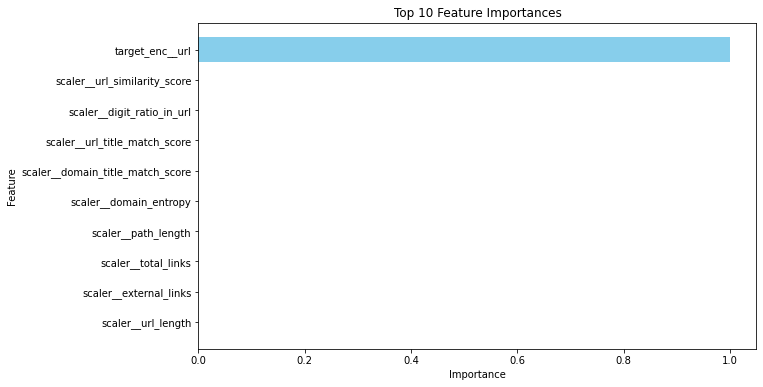

In [ ]:
import matplotlib.pyplot as plt


# Map feature importances to feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': importances
})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA



class PreprocessingPipelineWithPCA(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, n_components=0.95):
        self.target_column = target_column
        self.n_components = n_components
        self.pipeline = None  # Initialize in fit method

    def _build_pipeline(self):
        # Define feature groups as class-level attributes
        boolean_features = [
            'is_website_live','has_ip_address','shortened_url',
            'has_hyphen','contains_homograph_chars','has_brand_name_in_domain',
            'has_social_net', 'has_redirect','url_is_random','title_is_random',
            'description_is_random','is_expired'
            ]

        low_cardinality_categorical_features = [
            'title_similarity_bin', 'description_similarity_bin','similarity_bin','registration_type',
            'expiration_risk'
        ]

        high_cardinality_categorical_features = [
            'url', 'title', 'description', 'tld', 'domain'
        ]

        numeric_features = [
            'url_length','num_subdirectories', 'num_query_params', 'is_https',
            'num_subdomains','domain_length','total_links','external_links',
            'path_length','num_slashes','domain_entropy','char_repetition','common_phishing_words',
            'typosquatting_distance','path_suspicious_keywords','query_suspicious_keywords',
            'url_similarity_score','domain_title_match_score','url_title_match_score',
            'digit_ratio_in_url','domain_age','days_to_expiry','registration_duration'
        ]

        preprocessing_pipeline = ColumnTransformer(
            transformers=[
                ('target_enc', TargetEncoder(), high_cardinality_categorical_features),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), low_cardinality_categorical_features),
                ('scaler', StandardScaler(), numeric_features)
            ], remainder='passthrough'
        )

        return Pipeline(steps=[
            ('preprocessor', preprocessing_pipeline),
            ('pca', PCA(n_components=self.n_components))
        ])

    def fit(self, X, y=None):
        self.pipeline = self._build_pipeline()
        self.pipeline.fit(X, y)
        return self

    def transform(self, X, y=None):
        return self.pipeline.transform(X)


In [ ]:
from sklearn.metrics import classification_report, roc_curve, det_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

import joblib

# Store model results for DET and ROC plots
model_results = {}

# Train models with PCA, SMOTE, and hyperparameter tuning
fitted_pipelines = {}
for model_name, model in models.items():
    print(f"Training {model_name} with PCA and SMOTE...")

    # Define a full pipeline with SMOTE and the classifier
    pipeline = Pipeline([
        ("preprocessing", PreprocessingPipelineWithPCA(target_column='label', n_components=0.95)),
        ("smote", SMOTE(sampling_strategy=1.0, random_state=42)),
        ("classifier", model)
    ])

    # Apply RandomizedSearchCV if parameters are provided
    if model_name in param_grids:
        search = RandomizedSearchCV(
            pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=cv_strategy,
            scoring="f1_macro", random_state=42, n_jobs=-1
        )
        search.fit(X_train, y_train_encoded)  # Using raw X_train since pipeline handles preprocessing
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train, y_train_encoded)

    # Save the trained model pipeline
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    # Predictions and evaluation on test set
    y_pred = best_pipeline.predict(X_test)
    y_prob = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline, "predict_proba") else None

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test_encoded, y_pred, zero_division=0))

    # Store results for DET and ROC plotting
    model_results[model_name] = {
        "y_true": y_test_encoded,
        "y_prob": y_prob,
        "y_pred": y_pred
    }

    # Evaluate with cross-validation on test data
    cv_score = cross_val_score(best_pipeline, X_test, y_test_encoded, cv=cv_strategy, scoring="f1_macro").mean()
    print(f"{model_name} Test Weighted F1 Score: {cv_score:.4f}")
    print("\n" + "="*50 + "\n")


Training Dummy Classifier with PCA and SMOTE...

Classification Report for Dummy Classifier:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1834
           1       0.00      0.00      0.00      2138

    accuracy                           0.46      3972
   macro avg       0.23      0.50      0.32      3972
weighted avg       0.21      0.46      0.29      3972

Dummy Classifier Test Weighted F1 Score: 0.3159


Training Logistic Regression with PCA and SMOTE...
Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__class_weight': 'balanced', 'classifier__C': 10}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1834
           1       0.95      0.91      0.93      2138

    accuracy                           0.92      3972
   macro avg       0.92      0.92      0.92      3972
weighted avg       0.92      0.92

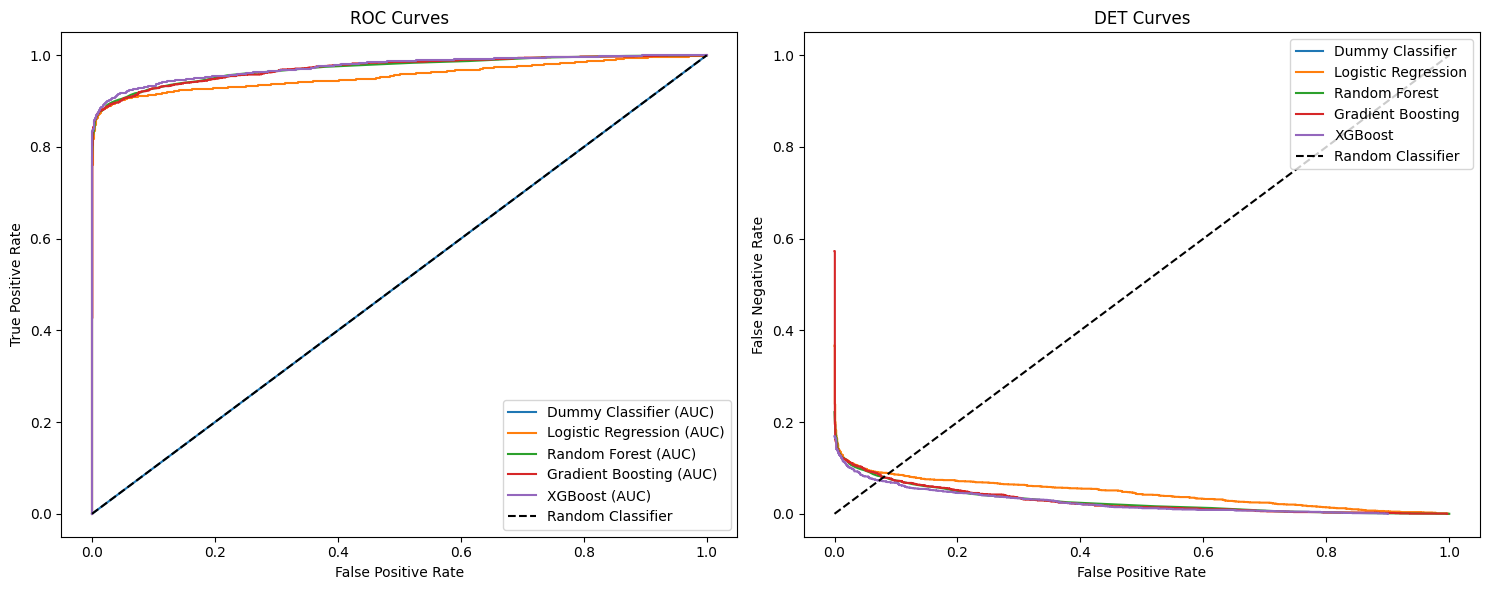

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, det_curve

# Plot ROC and DET curves for each model
plt.figure(figsize=(15, 6))

# Subplot for ROC curves
plt.subplot(1, 2, 1)
for model_name, results in model_results.items():
    if results["y_prob"] is not None:  # Ensure the model has probability outputs
        fpr, tpr, _ = roc_curve(results["y_true"], results["y_prob"])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC)")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Subplot for DET curves
plt.subplot(1, 2, 2)
for model_name, results in model_results.items():
    if results["y_prob"] is not None:
        fpr, fnr, _ = det_curve(results["y_true"], results["y_prob"])
        plt.plot(fpr, fnr, label=f"{model_name}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("DET Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

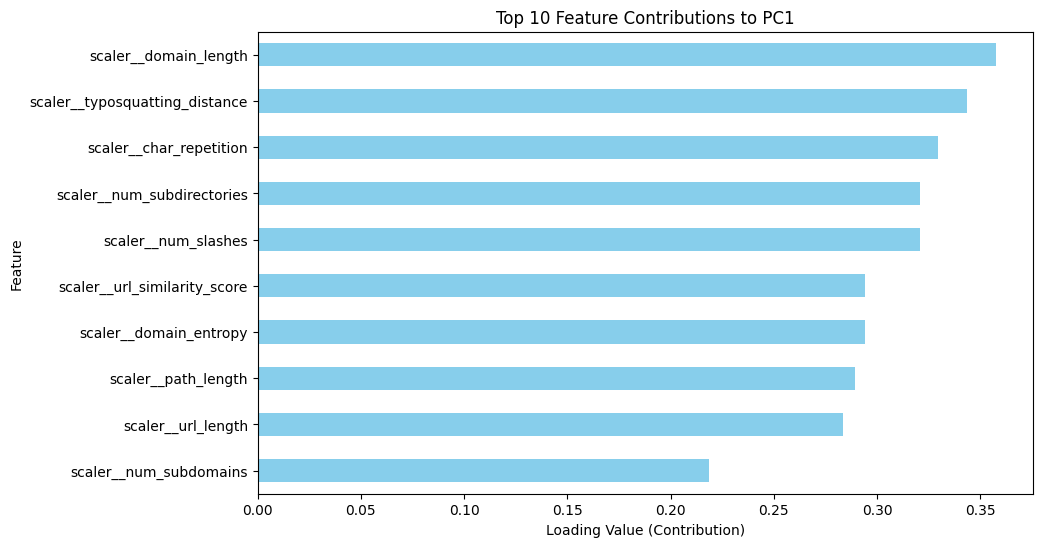

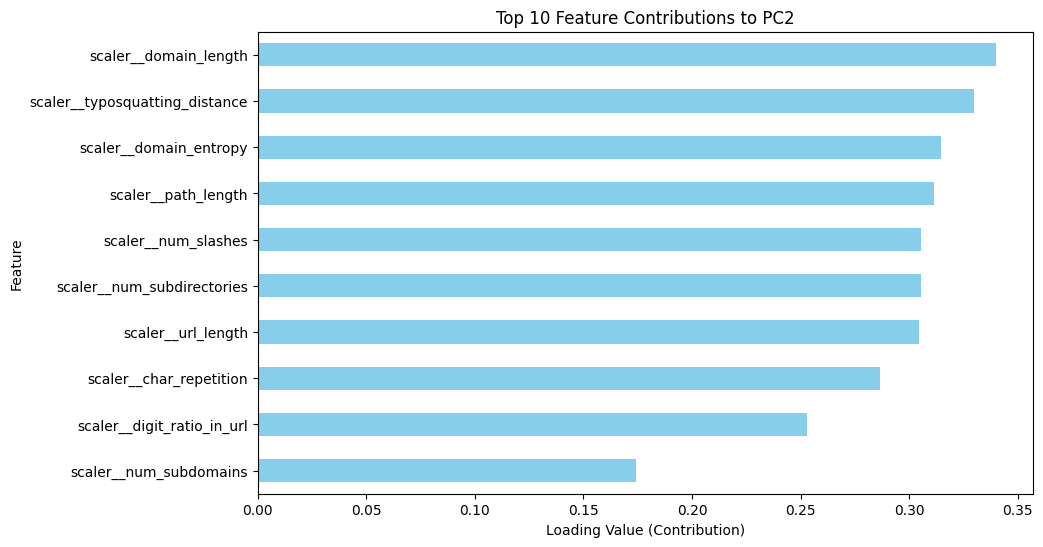

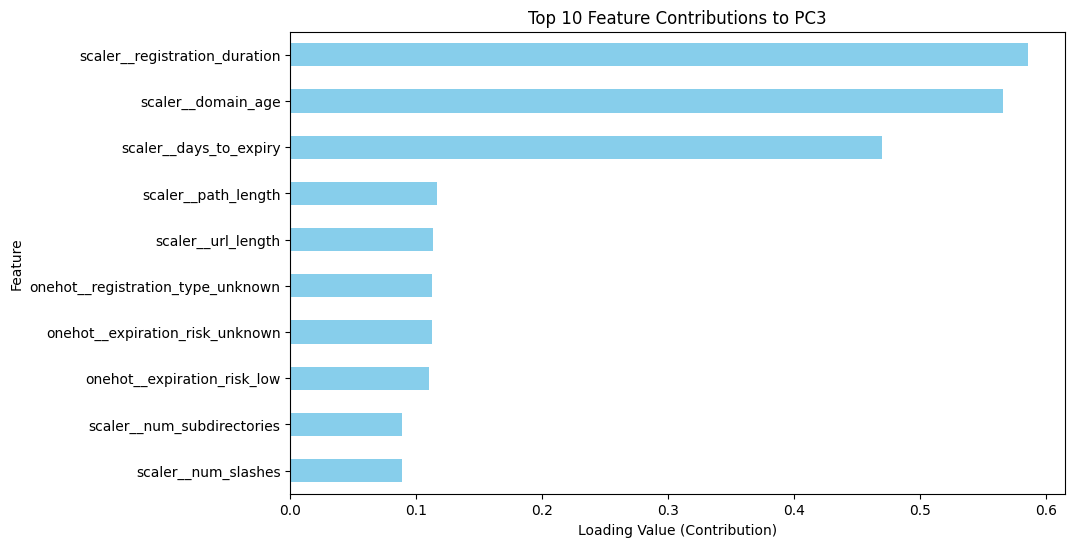

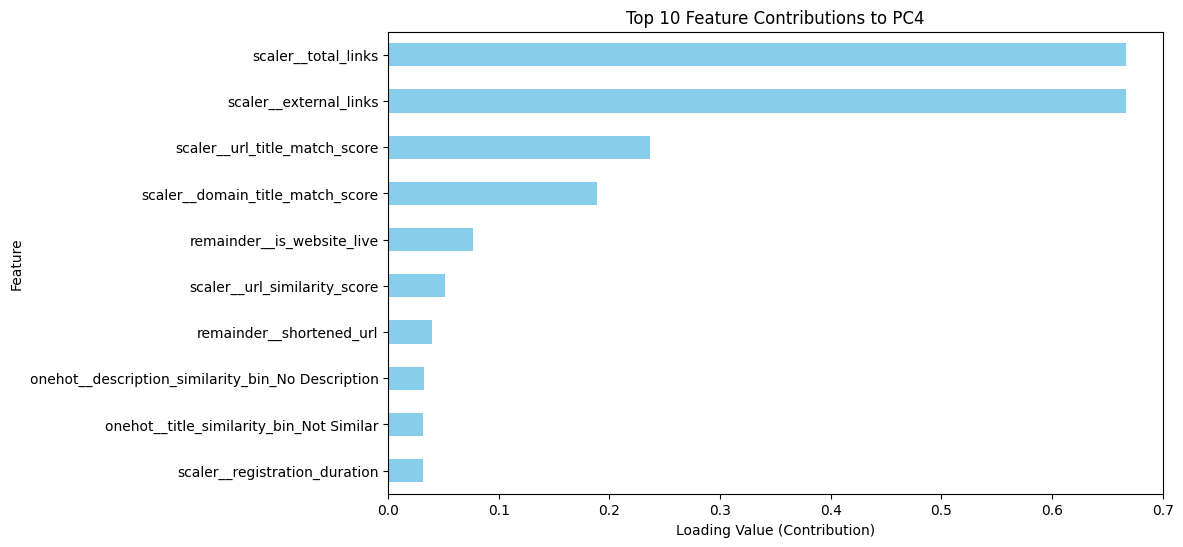

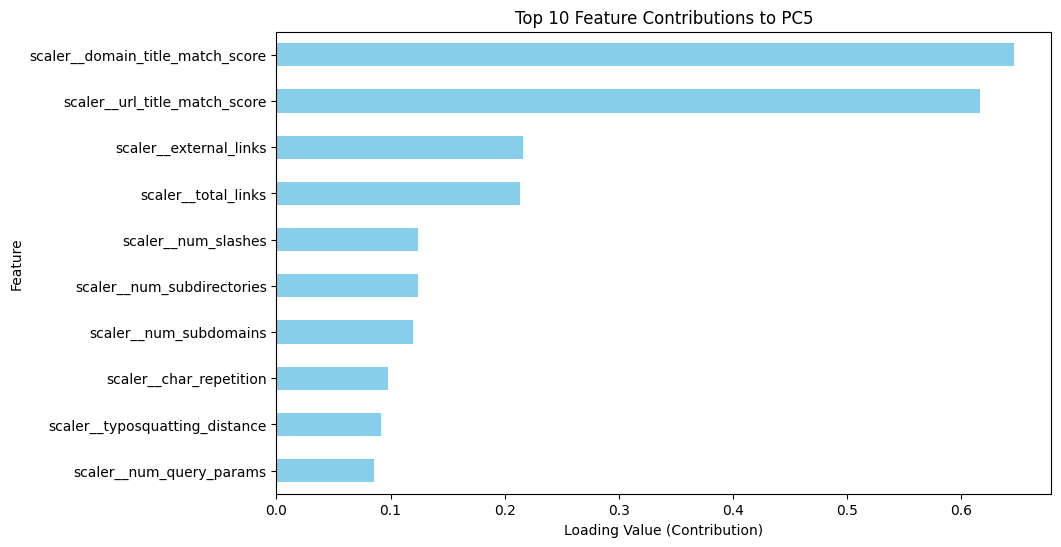


Explained Variance by Principal Component:
   Principal Component  Explained Variance Ratio
0                  PC1                  0.194658
1                  PC2                  0.134459
2                  PC3                  0.109367
3                  PC4                  0.086870
4                  PC5                  0.070463
5                  PC6                  0.051211
6                  PC7                  0.044318
7                  PC8                  0.043048
8                  PC9                  0.040955
9                 PC10                  0.040460
10                PC11                  0.032489
11                PC12                  0.029002
12                PC13                  0.025533
13                PC14                  0.022208
14                PC15                  0.017905
15                PC16                  0.015052


In [ ]:
# Assuming we have the best pipeline from the search
best_pipeline = search.best_estimator_  # example from the trained model with PCA
pca = best_pipeline.named_steps['preprocessing'].pipeline.named_steps['pca']

# Retrieve feature names after preprocessing (before PCA)
# Since ColumnTransformer may transform feature names, we extract them from the preprocessing pipeline
preprocessor = best_pipeline.named_steps['preprocessing'].pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Retrieve PCA components (loadings) and explained variance
loadings = pca.components_  # Shape: [n_components, n_features]
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with loadings and feature names
loading_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f"PC{i+1}" for i in range(loadings.shape[0])])

# Sort and plot the top features for each principal component
n_top_features = 10  # Number of top contributing features to plot per component

# Loop over each component to identify and plot top contributing features
for i, pc in enumerate(loading_df.columns[:min(5, loadings.shape[0])]):  # Limiting to first few PCs for readability
    top_features = loading_df[pc].abs().sort_values(ascending=False).head(n_top_features)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh', color='skyblue')
    plt.title(f"Top {n_top_features} Feature Contributions to {pc}")
    plt.xlabel("Loading Value (Contribution)")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # Highest contributions at the top
    plt.show()

# Summary of explained variance
explained_variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance
})
print("\nExplained Variance by Principal Component:")
print(explained_variance_df)